In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

for i in range(len(mnist_lbl)):
    print('{} : {}'.format(i, mnist_lbl[i]))

0 : T-shirt
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle_boot


In [4]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1),
                        kernel_size=(3, 3), padding='same',
                        filters=32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same',
                        filters=64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same',
                        filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist = model.fit(train_images, train_labels, 
                 epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 45s 31ms/step - loss: 0.4516 - accuracy: 0.8376 - val_loss: 0.3309 - val_accuracy: 0.8799
Epoch 2/5
1407/1407 [==============================] - 43s 30ms/step - loss: 0.2936 - accuracy: 0.8941 - val_loss: 0.2896 - val_accuracy: 0.8919
Epoch 3/5
1407/1407 [==============================] - 44s 32ms/step - loss: 0.2480 - accuracy: 0.9096 - val_loss: 0.2701 - val_accuracy: 0.9014
Epoch 4/5
1407/1407 [==============================] - 44s 31ms/step - loss: 0.2158 - accuracy: 0.9192 - val_loss: 0.2628 - val_accuracy: 0.9060
Epoch 5/5
1407/1407 [==============================] - 39s 28ms/step - loss: 0.1877 - accuracy: 0.9300 - val_loss: 0.2822 - val_accuracy: 0.9019


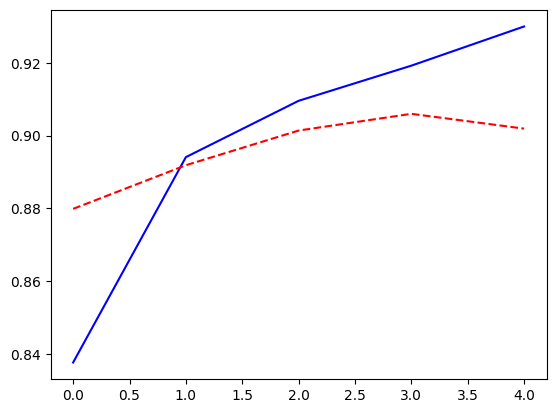

In [7]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)


313/313 - 3s - loss: 0.2954 - accuracy: 0.8969 - 3s/epoch - 9ms/step
테스트 정확도: 0.8968999981880188


In [9]:
images = test_images[:25]
pred = np.argmax(model.predict(images), axis=1)
print('예측값 =', pred)
print('실제값 =', test_labels[:25])


1/1 [==============================] - 0s 173ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


In [10]:
def plot_images(images, labels, images_per_row=5):
    n_images = len(images)
    n_rows = (n_images - 1) // images_per_row + 1
    fig, ax = plt.subplots(n_rows, images_per_row,
                           figsize=(images_per_row * 2, n_rows * 2))
    for i in range(n_rows):
        for j in range(images_per_row):
            if i * images_per_row + j >= n_images: break
            img_idx = i * images_per_row + j
            a_image = images[img_idx].reshape(28, 28)
            if n_rows > 1:
                axis = ax[i, j]
            else:
                axis = ax[j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            label = mnist_lbl[labels[img_idx]]
            axis.set_title(label)
            axis.imshow(a_image, cmap='gray', interpolation='nearest')


In [11]:
pred = np.argmax(model.predict(test_images), axis=1)
print('예측값 =', pred[:30])
print('실제값 =', test_labels[:30])


313/313 [==============================] - 3s 8ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1 6 6 0 9 3]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']
[[819   2  18   8   0   0  93   0   3   1]
 [  0 953   0   0   0   0   0   0   1   0]
 [  7   0 814   5  42   0  43   0   1   0]
 [ 25  29  15 921  31   0  38   0   3   0]
 [  7  11  68  44 885   0  75   0   2   0]
 [  2   0   0   0   0 976   0   9   7   6]
 [131   3  85  19  42   0 743   0   5   0]
 [  1   0   0   1   0  19   2 984   7  89]
 [  8   2   0   2   0   0   6   0 970   0]
 [  0   0   0   0   0   5   0   7   1 904]]


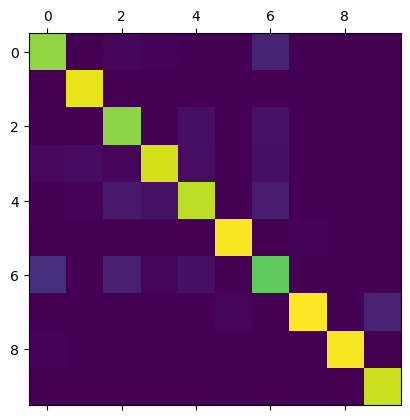

In [13]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred, test_labels)
print(mnist_lbl)
print(conf_mat)
plt.matshow(conf_mat)
